## Due date - Saturday 10/30/2021 11.59 PM 

## General instructions

You can use any function from sklearn that can be found in the following link:  
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
Particularly, you can use built in models in sklearn

You can also use built-in functions from numpy and pandas

You can use refer to your homework submissions for this class, class lectures and the text book.

You cannot use any other functions. If you absolute need to use other functions, check with me first

You cannot use any other resources and you cannot discuss the exam with anyone other than me or the TA.

If you have any questions, use the discussion forums to ask questions.

## Classification (50 points)

Your task is to build a good classifier based on the techniques we have learned in class so far.  The training dataset to use is **Midterm1_Classification.csv** . For your choice of the classifier, provide the model parameters, confusion matrix and accuracy of classification. This is a design problem - so explain how you would go about picking the best classifier.  
....................................................................................................................................................

....................................................................................................................................................
### I will begin this problem by testing the data on the following types of models: linear-regression (just to show how bad), logistic regression, linear discriminant analysis

### Importing used libraries: 


In [21]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


### Importing the data

In [14]:
data = pd.read_csv('Midterm1_Classification.csv')
data.head()

,Unnamed: 0,x1,x2,x3,y
0,0,2.101994,4.708075,3.114412,1.0
1,1,0.802594,-0.786734,3.221316,2.0
2,2,1.383541,1.555204,0.717551,2.0
3,3,0.791015,-1.563133,-1.036152,2.0
4,4,-0.434388,1.938290,-1.393905,3.0


### Plotting the data for visulization

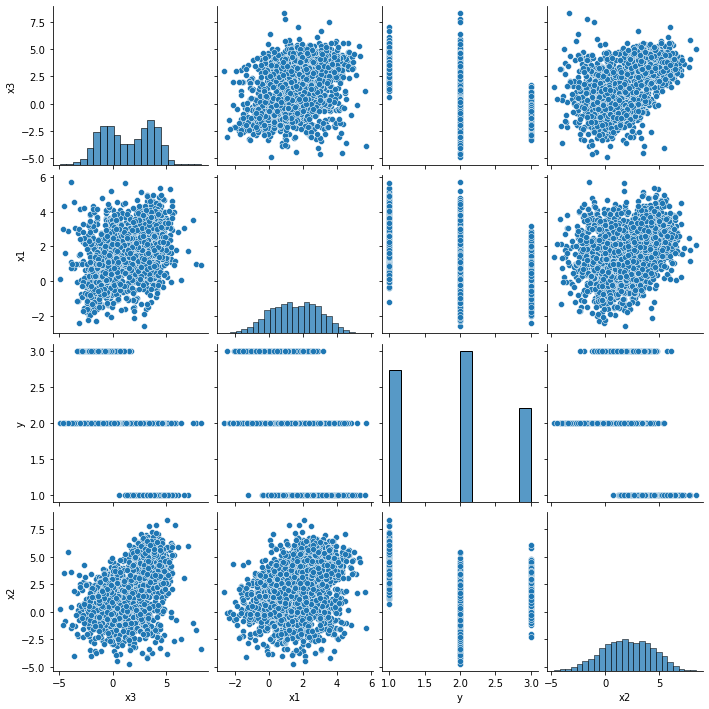

In [28]:
#Scatterplot
sns.pairplot(data,vars = {'x1','x2','x3','y'})

The plot above shows that this is a classification of Y = {1,2,3} based on Xn for n = {1,2,3}
### Assigning and Initializing Variables

In [66]:
#Assigning individual Xn's
x1 = data.iloc[:,1:2].values
x2 = data.iloc[:,2:3].values
x3 = data.iloc[:,3:4].values

#Matrix of all X values 
x = data.iloc[:,1:4].values
#Assigning Y 
y = data.iloc[:,4:5].values

print(y)

[[1.]
 [2.]
 [2.]
 ...
 [3.]
 [1.]
 [1.]]


## Beginning with a mult-variable linear regression (just to show how bad this would model categorical data)


Coefficents: [[-0.14425836 -0.045414   -0.19684114]]
Intercept: [2.48877259]
Predicted Y values: 
 [[1.35868555]
 [1.77463292]
 [2.07731368]
 ...
 [2.77361855]
 [1.00285408]
 [1.50846249]]


Text(0.5, 1.0, 'Predicted Y values using linear regression')

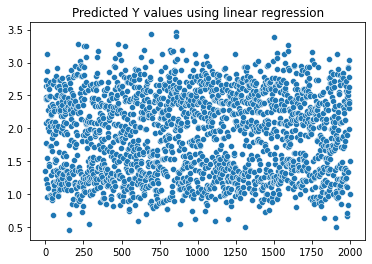

In [67]:
#Declaring the linear regression
mul_lin_reg = sklearn.linear_model.LinearRegression()
#Fitting the linear regression
mul_lin_reg.fit(x,y)
print('Coefficents:',mul_lin_reg.coef_)
print('Intercept:',mul_lin_reg.intercept_)
mul_lin_reg_pred = mul_lin_reg.predict(x)

#plotting the predictions
print('Predicted Y values: \n',mul_lin_reg_pred)

#Graphing the predicted values for visualization 
sns.scatterplot(x = np.arange(len(y)),y = mul_lin_reg_pred[:,0])
plt.title('Predicted Y values using linear regression')

### The multi-variable regression did not work at all since the Y is categorical 

## The next regression will be the logistic

INTERCEPT COEFFICENT: -9.965639994921935
X1 COEFFICENT: 0.8305088633579648
X2 COEFFICENT: 1.6695147377940684
X3 COEFFICENT: 1.4413265409071094


C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Text(0.5, 1.0, 'Predicted Y values using linear regression')

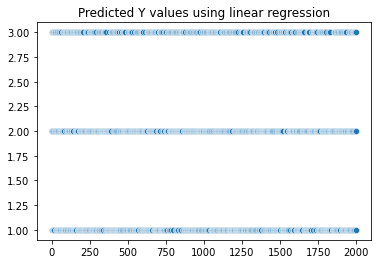

In [74]:
#Declaring that logistic regression 
log_reg = sklearn.linear_model.LogisticRegression(solver = 'saga',
                                                 fit_intercept= True,
                                                 multi_class='ovr') 
#making y a 1d array 
y = data.iloc[:,4].values

#Fitting the logistic regression
log_reg.fit(x,y)

print('INTERCEPT COEFFICENT:',log_reg.intercept_[0])
print('X1 COEFFICENT:',log_reg.coef_[0,0])
print('X2 COEFFICENT:',log_reg.coef_[0,1])
print('X3 COEFFICENT:',log_reg.coef_[0,2])

#getting the predicted values 
y_logreg = log_reg.predict(x)

#Graphing the predicted values for visualization 
sns.scatterplot(x = np.arange(len(y)),y = y_logreg)
plt.title('Predicted Y values using linear regression')

### Now the logistic regression worked with the categorical data so now to test how well it worked

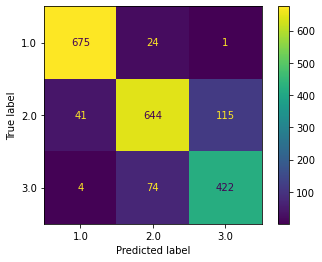

In [90]:
#This is from sklearn to create a confusion matrix
log_conf_matrix = sklearn.metrics.confusion_matrix(y,y_logreg,labels=log_reg.classes_)

#Displaying the confusion matrix
disp_logconf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=log_conf_matrix,
                                                     display_labels=log_reg.classes_)
disp_logconf.plot()
plt.show()
